In [168]:
from matplotlib.image import imread
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
from collections import Counter

In [3]:
#resize board image to (640, 640)
def resize_board_image(img_path):
    img = Image.open(img_path)
    img = img.resize((640, 640))
    img.save(img_path)
    return img_path

In [4]:
#turn grayscale; size 1D output
def grayscale(board):
    #grayscale value
    #RGB Value to grayscale formula (NTSC):
    #0.299 ∙ Red + 0.587 ∙ Green + 0.114 ∙ Blue
    board_gray = []
    for i in range(board.shape[0]):
        board_gray_row = []
        for j in range (board.shape[1]):
            r = board[i,j,0]
            g = board[i,j,1]
            b = board[i,j,2]
            board_gray_row.append(0.299*r + 0.587*g + 0.114*b)
        board_gray.append(board_gray_row)
    return np.array(board_gray)

In [5]:
#isolate each square on board
def get_squares(board):
    squares = []
    square_width = int(board.shape[0]/8)
    square_height = int(board.shape[1]/8)
    for i in range(8):
        squares_row = []
        for j in range (8):
            square = board[(square_height*i):(square_height*(i+1)), (square_width*j):(square_width*(j+1))]
            squares_row.append(square)
        squares.append(squares_row)
    return np.array(squares)

In [6]:
#crop out border
def crop(source, value):
    square = []
    for i in range(int(source.shape[0]*value), int(source.shape[0]*(1-value))):
        square_row = []
        for j in range (int(source.shape[0]*value), int(source.shape[0]*(1-value))):
            square_row.append(source[i][j])
        square.append(square_row)
    return np.array(square)

In [7]:
#save piece as txt file
def save_txt(square, save_path, tag, num):
    if num < 10:
        np.savetxt(f"{save_path}/{tag}00{num}.txt", square, delimiter =" ")
    elif num < 100:
        np.savetxt(f"{save_path}/{tag}0{num}.txt", square, delimiter =" ")
    else:
        np.savetxt(f"{save_path}/{tag}{num}.txt", square, delimiter =" ")

In [8]:
#get pieces from board
def get_board_pieces(path):
    #initialize number tags
    lb = 0
    db = 0
    lw = 0
    dw = 0
    
    for board_name in os.listdir(path):
        board_path = f"{path}/{board_name}"
        board = imread(resize_board_image(board_path))
        squares = get_squares(grayscale(board))
        #black pieces
        for i in range(8):
            if i%2==0: #even index -> light square
                lb += 1
#                 save_img(crop(squares[0,i],0.125), "light_squares/black_pieces", "lb", lb) #save img*
                save_txt(crop(squares[0,i],0.125), "light_squares_txt/black_pieces_txt", "lb", lb)
            else:
                db += 1
#                 save_img(crop(squares[0,i],0.125), "dark_squares/black_pieces", "db", db) #*
                save_txt(crop(squares[0,i],0.125), "dark_squares_txt/black_pieces_txt", "db", db)
        #get pawn for each square color
        db += 1
#         save_img(crop(squares[1,0],0.125), "dark_squares/black_pieces", "db", db) #*
        save_txt(crop(squares[1,0],0.125), "dark_squares_txt/black_pieces_txt", "db", db)
        lb += 1
#         save_img(crop(squares[1,1],0.125), "light_squares/black_pieces", "lb", lb) #*
        save_txt(crop(squares[1,1],0.125), "light_squares_txt/black_pieces_txt", "lb", lb)

        #white pieces
        for i in range(8):
            if i%2==0: #even index -> dark square
                dw += 1
#                 save_img(crop(squares[7,i],0.125), "dark_squares/white_pieces", "dw", dw) #*
                save_txt(crop(squares[7,i],0.125), "dark_squares_txt/white_pieces_txt", "dw", dw)
            else:
                lw += 1
#                 save_img(crop(squares[7,i],0.125), "light_squares/white_pieces", "lw", lw) #*
                save_txt(crop(squares[7,i],0.125), "light_squares_txt/white_pieces_txt", "lw", lw)
        #get pawn for each square color
        lw += 1
#         save_img(crop(squares[6,0],0.125), "light_squares/white_pieces", "lw", lw) #*
        save_txt(crop(squares[6,0],0.125), "light_squares_txt/white_pieces_txt", "lw", lw)
        dw += 1
#         save_img(crop(squares[6,1],0.125), "dark_squares/white_pieces", "dw", dw) #*
        save_txt(crop(squares[6,1],0.125), "dark_squares_txt/white_pieces_txt", "dw", dw)

In [9]:
def prewitt(square):
    square_height, square_width = square.shape
    #prewitt kernel
    h_filter = np.array([[-1, 0, 1], 
                        [-1, 0, 1], 
                        [-1, 0, 1]])
    v_filter = np.array([[-1, -1, -1], 
                        [ 0,  0,  0], 
                        [ 1,  1,  1]])

    #initialize gradient image
    gradient_image = np.zeros((square_height, square_width))

    for i in range(1, square_height - 1):
        for j in range(1, square_width - 1):
            h_value = (h_filter[0, 0] * square[i - 1, j - 1]) + \
                      (h_filter[0, 1] * square[i - 1, j]) + \
                      (h_filter[0, 2] * square[i - 1, j + 1]) + \
                      (h_filter[1, 0] * square[i, j - 1]) + \
                      (h_filter[1, 1] * square[i, j]) + \
                      (h_filter[1, 2] * square[i, j + 1]) + \
                      (h_filter[2, 0] * square[i + 1, j - 1]) + \
                      (h_filter[2, 1] * square[i + 1, j]) + \
                      (h_filter[2, 2] * square[i + 1, j + 1])

            v_value = (v_filter[0, 0] * square[i - 1, j - 1]) + \
                      (v_filter[0, 1] * square[i - 1, j]) + \
                      (v_filter[0, 2] * square[i - 1, j + 1]) + \
                      (v_filter[1, 0] * square[i, j - 1]) + \
                      (v_filter[1, 1] * square[i, j]) + \
                      (v_filter[1, 2] * square[i, j + 1]) + \
                      (v_filter[2, 0] * square[i + 1, j - 1]) + \
                      (v_filter[2, 1] * square[i + 1, j]) + \
                      (v_filter[2, 2] * square[i + 1, j + 1])
            #value per pixel in gradient image
            magnitude = np.sqrt(pow(h_value, 2) + pow(v_value, 2))
            gradient_image[i - 1, j - 1] = magnitude
    return gradient_image

In [10]:
#get feature vector
def feature_vector(array): #ndarray input
    return np.reshape(array, array.size)

In [11]:
#"distance" from avg_img
def euclidean_distance(v1, v2): #ndarray inputs
    if(v1.size != v2.size):
        print("Error")
    squared_differences = 0
    for i in range(v1.size):
        squared_differences += pow((v1[i] - v2[i]), 2)
    return np.sqrt(squared_differences)

In [13]:
#create "average image" for each: db, dw, lb, lw
def get_avg_img():
    #dark_squares
    #db
    avg_img_db = np.zeros((60, 60))
    n = 0
    for txt in os.listdir("dark_squares_txt/black_pieces_txt"):
        array = np.loadtxt(f"dark_squares_txt/black_pieces_txt/{txt}")
        avg_img_db += array
        n += 1
    avg_img_db /= n
    #dw
    avg_img_dw = np.zeros((60, 60))
    n = 0
    for txt in os.listdir("dark_squares_txt/white_pieces_txt"):
        array = np.loadtxt(f"dark_squares_txt/white_pieces_txt/{txt}")
        avg_img_dw += array
        n += 1
    avg_img_dw /= n

    #light_squares
    #lb
    avg_img_lb = np.zeros((60, 60))
    n = 0
    for txt in os.listdir("light_squares_txt/black_pieces_txt"):
        array = np.loadtxt(f"light_squares_txt/black_pieces_txt/{txt}")
        avg_img_lb += array
        n += 1
    avg_img_lb /= n
    #lw
    avg_img_lw = np.zeros((60, 60))
    n = 0
    for txt in os.listdir("light_squares_txt/white_pieces_txt"):
        array = np.loadtxt(f"light_squares_txt/white_pieces_txt/{txt}")
        avg_img_lw += array
        n += 1
    avg_img_lw /= n
    
    return [avg_img_db, avg_img_dw, avg_img_lb, avg_img_lw]

In [12]:
#get distance of each sample
def get_distances(avg_img_fvector, folder_path):
    distances = []
    for image in os.listdir(folder_path):
        img_fvector = feature_vector(np.loadtxt(f"{folder_path}/{image}"))
        distances.append(euclidean_distance(avg_img_fvector, img_fvector))
    return np.array(distances)

In [44]:
#get "average image" of prewitts of each piece type
def get_avg_prewitt():
    def get_avg(db, dw, lb, lw):
        #position > 4 = skip
        avg = np.zeros((60, 60))
        n = 0
        #db
        if db > 4:
            pass
        else:
            for i,txt in enumerate(os.listdir(f"dark_squares_txt/black_pieces_txt")):
                if i%5 == db:
                    array = prewitt(np.loadtxt(f"dark_squares_txt/black_pieces_txt/{txt}"))
                    avg += array
                    n += 1
        #dw
        if dw > 4:
            pass
        else:
            for i,txt in enumerate(os.listdir(f"dark_squares_txt/white_pieces_txt")):
                if i%5 == dw:
                    array = prewitt(np.loadtxt(f"dark_squares_txt/white_pieces_txt/{txt}"))
                    avg += array
                    n += 1
        #lb
        if lb > 4:
            pass
        else:
            for i,txt in enumerate(os.listdir(f"light_squares_txt/black_pieces_txt")):
                if i%5 == lb:
                    array = prewitt(np.loadtxt(f"light_squares_txt/black_pieces_txt/{txt}"))
                    avg += array
                    n += 1
        #lw
        if lw > 4:
            pass
        else:
            for i,txt in enumerate(os.listdir(f"light_squares_txt/white_pieces_txt")):
                if i%5 == lw:
                    array = prewitt(np.loadtxt(f"light_squares_txt/white_pieces_txt/{txt}"))
                    avg += array
                    n += 1
        avg /= n
        return avg
    
#     (db, dw, lb, lw) positions based on get_board_pieces()
#     p: n%5==4 all (4,4,4,4)
#     r: n%5==3 db, lw; n%5==0 dw, lb (3, 0, 0, 3)
#     n: n%5==0 db, lw; n%5==3 dw, lb (0, 3, 3, 0)
#     b: n%5==2 db, lw; n%5==1 dw, lb (2, 1, 1, 2)
#     k: n%5==1 dw; n%5==2 lb (5, 1, 2, 5)
#     q: n%5==1 db; n%5==2 lw (1, 5, 5, 2)

    avg_p_p = get_avg(4, 4, 4, 4)
    avg_p_r = get_avg(3, 0, 0, 3)
    avg_p_n = get_avg(0, 3, 3, 0)
    avg_p_b = get_avg(2, 1, 1, 2)
    avg_p_k = get_avg(5, 2, 2, 5)
    avg_p_q = get_avg(1, 5, 5, 1)

    return [avg_p_p, avg_p_r, avg_p_n, avg_p_b, avg_p_k, avg_p_q]

In [58]:
#points: (p, r, n, b, k, q) each dimension are distances to each corresponding piece avg_prewitt
def get_prewitt_distances(db, dw, lb, lw, avg_prewitt):
    #position > 4 = skip
    prewitt_distances = []
    #db
    if db > 4:
        pass
    else:
        for i,txt in enumerate(os.listdir(f"dark_squares_txt/black_pieces_txt")):
            if i%5 == db:
                array = prewitt(np.loadtxt(f"dark_squares_txt/black_pieces_txt/{txt}"))
                prewitt_distances.append(euclidean_distance(feature_vector(array), feature_vector(avg_prewitt)))
    #dw
    if dw > 4:
        pass
    else:
        for i,txt in enumerate(os.listdir(f"dark_squares_txt/white_pieces_txt")):
            if i%5 == dw:
                array = prewitt(np.loadtxt(f"dark_squares_txt/white_pieces_txt/{txt}"))
                prewitt_distances.append(euclidean_distance(feature_vector(array), feature_vector(avg_prewitt)))
    #lb
    if lb > 4:
        pass
    else:
        for i,txt in enumerate(os.listdir(f"light_squares_txt/black_pieces_txt")):
            if i%5 == lb:
                array = prewitt(np.loadtxt(f"light_squares_txt/black_pieces_txt/{txt}"))
                prewitt_distances.append(euclidean_distance(feature_vector(array), feature_vector(avg_prewitt)))
    #lw
    if lw > 4:
        pass
    else:
        for i,txt in enumerate(os.listdir(f"light_squares_txt/white_pieces_txt")):
            if i%5 == lw:
                array = prewitt(np.loadtxt(f"light_squares_txt/white_pieces_txt/{txt}"))
                prewitt_distances.append(euclidean_distance(feature_vector(array), feature_vector(avg_prewitt)))
    return np.array(prewitt_distances)

In [28]:
#binary classifier for piece color
class SVM:

    def __init__(self, learning_rate=0.001, reg=0.01):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.reg = reg
        
    def fit(self, X, y): #X & y as ndarrays
        n_samples, n_features = X.shape

        y_labels = np.where(y <= 0, -1, 1) #class labels

        #init weights and bias; can be randomized
        self.weights = np.zeros(n_features) # 
        self.bias = 0
        
        #fitting
        for _ in range(10000): #no. of iterations can be changed
            for i, x_i in enumerate(X):
                if y_labels[i] * (np.dot(x_i, self.weights) - self.bias) >= 1:
                    self.weights -= self.learning_rate * (2 * self.reg * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.reg * self.weights - np.dot(x_i, y_labels[i]))
                    self.bias -= self.learning_rate * y_labels[i]


    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

In [15]:
#draw plot: training data, support vectors, decision boundary
def visualize_svm(svm, X, y):
    def get_hyperplane_value(x, weights, bias, offset):
        return (-weights[0] * x + bias + offset) / weights[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_facecolor("khaki")
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, cmap="binary")
    plt.xlabel("Distance from Black Avg")
    plt.ylabel("Distance from White Avg")

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, svm.weights, svm.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, svm.weights, svm.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, svm.weights, svm.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, svm.weights, svm.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, svm.weights, svm.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, svm.weights, svm.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--") # decision boundary
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "w") # white sv 
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k") # black sv
    
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

In [55]:

#multi-class classifier for piece type
class KNN:
    def __init__(self, k): #optimal k = sqrt of no. of data points
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions
        
    def _predict(self, x):
        #get distances
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        
        #get closest k neighbors
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        
        #majority vote
        return Counter(k_nearest_labels).most_common()[0][0]

In [169]:
#compute accuracy
def accuracy(actual, predictions):
    return np.sum(actual == predictions) / len(actual)

In [76]:
#run only when there are new boards
# get_board_pieces("boards")

In [17]:
avg_img_db, avg_img_dw, avg_img_lb, avg_img_lw = get_avg_img()

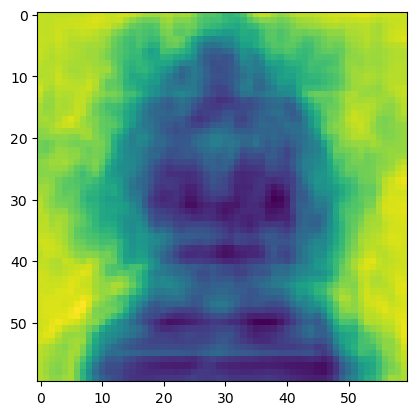

In [18]:
plt.imshow(avg_img_db)

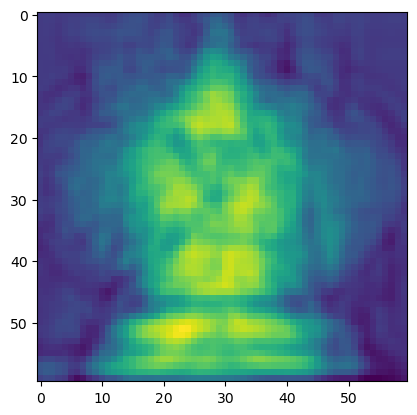

In [19]:
plt.imshow(avg_img_dw)

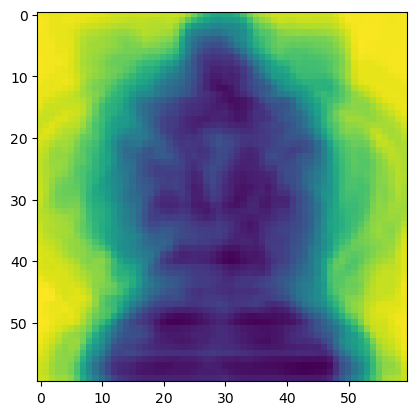

In [20]:
plt.imshow(avg_img_lb)

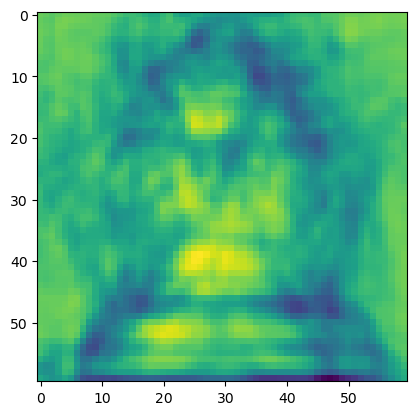

In [21]:
plt.imshow(avg_img_lw)

In [22]:
#x: distance to avg_img_db; y: distance to avg_img_dw
#dark 
d_b_to_b = get_distances(feature_vector(avg_img_db), "dark_squares_txt/black_pieces_txt")
d_b_to_w = get_distances(feature_vector(avg_img_dw), "dark_squares_txt/black_pieces_txt")
d_w_to_b = get_distances(feature_vector(avg_img_db), "dark_squares_txt/white_pieces_txt")
d_w_to_w = get_distances(feature_vector(avg_img_dw), "dark_squares_txt/white_pieces_txt")
db = np.array([(lambda i: np.array([d_b_to_b[i],d_b_to_w[i]]))(i) for i in range(d_b_to_b.size)])
dw = np.array([(lambda i: np.array([d_w_to_b[i],d_w_to_w[i]]))(i) for i in range(d_w_to_b.size)])
x_ds_train = np.concatenate((db,dw),axis=0)
y_ds_train = np.append(np.ones(dw.shape[0]), (np.ones(db.shape[0])*-1)) #white: 1; black: -1

# light
l_b_to_b = get_distances(feature_vector(avg_img_lb), "light_squares_txt/black_pieces_txt")
l_b_to_w = get_distances(feature_vector(avg_img_lw), "light_squares_txt/black_pieces_txt")
l_w_to_b = get_distances(feature_vector(avg_img_lb), "light_squares_txt/white_pieces_txt")
l_w_to_w = get_distances(feature_vector(avg_img_lw), "light_squares_txt/white_pieces_txt")
lb = np.array([(lambda i: np.array([l_b_to_b[i],l_b_to_w[i]]))(i) for i in range(l_b_to_b.size)])
lw = np.array([(lambda i: np.array([l_w_to_b[i],l_w_to_w[i]]))(i) for i in range(l_w_to_b.size)])
x_ls_train = np.concatenate((lb,lw),axis=0)
y_ls_train = np.append(np.ones(lw.shape[0]), (np.ones(lb.shape[0])*-1))

SVM classification accuracy 0.96


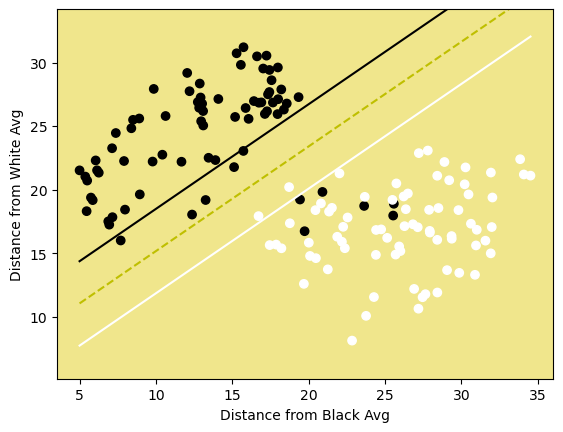

In [29]:
#TEST Training

#dark squares
d_svm = SVM()
d_svm.fit(x_ds_train, y_ds_train)
predictions = d_svm.predict(x_ds_train)
print("SVM classification accuracy", accuracy(y_ds_train, predictions))
visualize_svm(d_svm, x_ds_train, y_ds_train)

SVM classification accuracy 0.9466666666666667


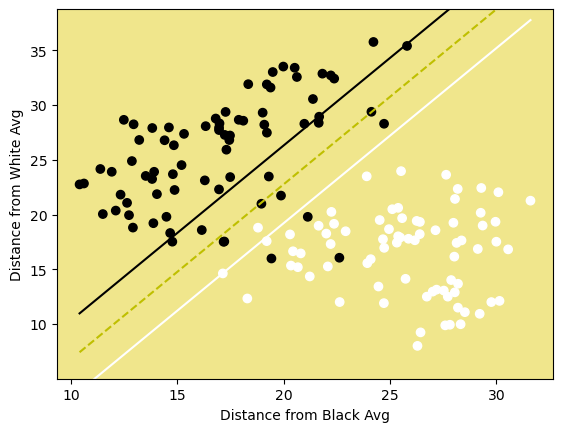

In [30]:
#light squares
l_svm = SVM()
l_svm.fit(x_ls_train, y_ls_train)
predictions = l_svm.predict(x_ls_train)
print("SVM classification accuracy", accuracy(y_ls_train, predictions))
visualize_svm(l_svm, x_ls_train, y_ls_train)

In [45]:
avg_p_p, avg_p_r, avg_p_n, avg_p_b, avg_p_k, avg_p_q = get_avg_prewitt()

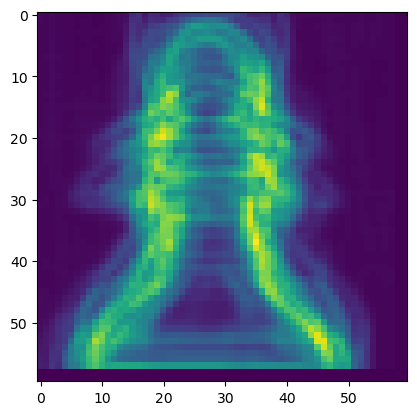

In [46]:
plt.imshow(avg_p_p)

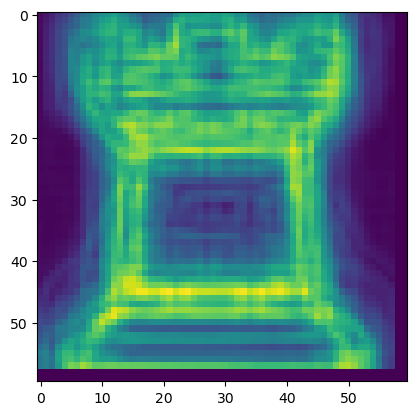

In [40]:
plt.imshow(avg_p_r)

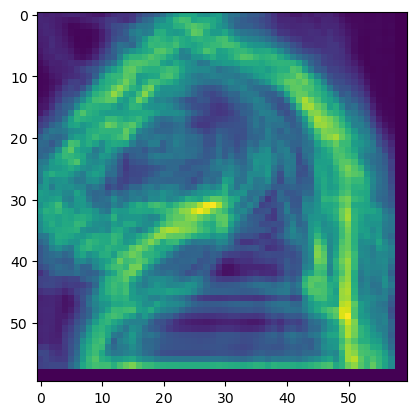

In [41]:
plt.imshow(avg_p_n)

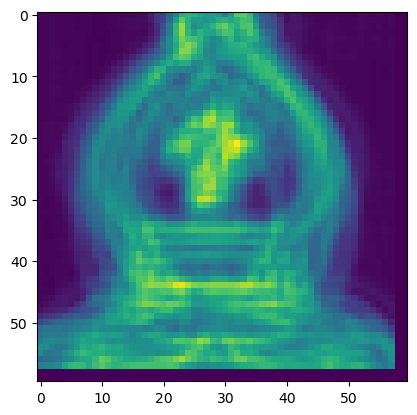

In [42]:
plt.imshow(avg_p_b)

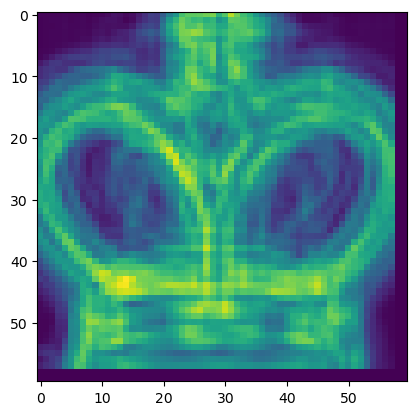

In [43]:
plt.imshow(avg_p_k)

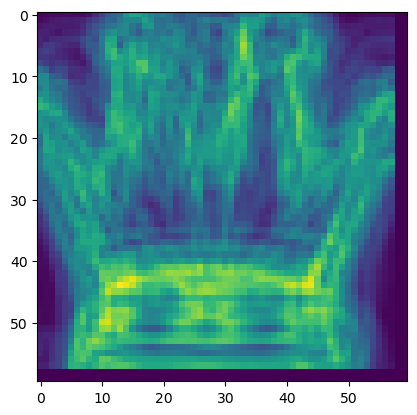

In [44]:
plt.imshow(avg_p_q)

In [59]:
#distances of each piece type to the avg_prewitts of each piece type
#     (db, dw, lb, lw) positions based on get_board_pieces()
#     p: n%5==4 all (4,4,4,4)
#     r: n%5==3 db, lw; n%5==0 dw, lb (3, 0, 0, 3)
#     n: n%5==0 db, lw; n%5==3 dw, lb (0, 3, 3, 0)
#     b: n%5==2 db, lw; n%5==1 dw, lb (2, 1, 1, 2)
#     k: n%5==1 dw; n%5==2 lb (5, 1, 2, 5)
#     q: n%5==1 db; n%5==2 lw (1, 5, 5, 2)

#pawn
p_p = get_prewitt_distances(4, 4, 4, 4, avg_p_p)
r_p = get_prewitt_distances(3, 0, 0, 3, avg_p_p)
n_p = get_prewitt_distances(0, 3, 3, 0, avg_p_p)
b_p = get_prewitt_distances(2, 1, 1, 2, avg_p_p)
k_p = get_prewitt_distances(5, 2, 2, 5, avg_p_p)
q_p = get_prewitt_distances(1, 5, 5, 1, avg_p_p)

#rook
p_r = get_prewitt_distances(4, 4, 4, 4, avg_p_r)
r_r = get_prewitt_distances(3, 0, 0, 3, avg_p_r)
n_r = get_prewitt_distances(0, 3, 3, 0, avg_p_r)
b_r = get_prewitt_distances(2, 1, 1, 2, avg_p_r)
k_r = get_prewitt_distances(5, 2, 2, 5, avg_p_r)
q_r = get_prewitt_distances(1, 5, 5, 1, avg_p_r)

#knight
p_n = get_prewitt_distances(4, 4, 4, 4, avg_p_n)
r_n = get_prewitt_distances(3, 0, 0, 3, avg_p_n)
n_n = get_prewitt_distances(0, 3, 3, 0, avg_p_n)
b_n = get_prewitt_distances(2, 1, 1, 2, avg_p_n)
k_n = get_prewitt_distances(5, 2, 2, 5, avg_p_n)
q_n = get_prewitt_distances(1, 5, 5, 1, avg_p_n)

#bishop
p_b = get_prewitt_distances(4, 4, 4, 4, avg_p_b)
r_b = get_prewitt_distances(3, 0, 0, 3, avg_p_b)
n_b = get_prewitt_distances(0, 3, 3, 0, avg_p_b)
b_b = get_prewitt_distances(2, 1, 1, 2, avg_p_b)
k_b = get_prewitt_distances(5, 2, 2, 5, avg_p_b)
q_b = get_prewitt_distances(1, 5, 5, 1, avg_p_b)

#king
p_k = get_prewitt_distances(4, 4, 4, 4, avg_p_k)
r_k = get_prewitt_distances(3, 0, 0, 3, avg_p_k)
n_k = get_prewitt_distances(0, 3, 3, 0, avg_p_k)
b_k = get_prewitt_distances(2, 1, 1, 2, avg_p_k)
k_k = get_prewitt_distances(5, 2, 2, 5, avg_p_k)
q_k = get_prewitt_distances(1, 5, 5, 1, avg_p_k)

#queen
p_q = get_prewitt_distances(4, 4, 4, 4, avg_p_q)
r_q = get_prewitt_distances(3, 0, 0, 3, avg_p_q)
n_q = get_prewitt_distances(0, 3, 3, 0, avg_p_q)
b_q = get_prewitt_distances(2, 1, 1, 2, avg_p_q)
k_q = get_prewitt_distances(5, 2, 2, 5, avg_p_q)
q_q = get_prewitt_distances(1, 5, 5, 1, avg_p_q)

In [75]:
#6D points of each piece type; axes in this order: p, r, n, b, k, q
p_points = np.stack((p_p, p_r, p_n, p_b, p_k, p_q), axis=-1)
r_points = np.stack((r_p, r_r, r_n, r_b, r_k, r_q), axis=-1)
n_points = np.stack((n_p, n_r, n_n, n_b, n_k, n_q), axis=-1)
b_points = np.stack((b_p, b_r, b_n, b_b, b_k, b_q), axis=-1)
k_points = np.stack((k_p, k_r, k_n, k_b, k_k, k_q), axis=-1)
q_points = np.stack((q_p, q_r, q_n, q_b, q_k, q_q), axis=-1)

In [161]:
#prep training data for KNN
x_train = np.concatenate((p_points, r_points, n_points, b_points, k_points, q_points), axis=0)
y_train = np.array([0 for x in range(p_points.shape[0])] + [1 for x in range(r_points.shape[0])] + \
                   [2 for x in range(n_points.shape[0])] + [3 for x in range(b_points.shape[0])] + \
                   [4 for x in range(k_points.shape[0])] + [5 for x in range(q_points.shape[0])])

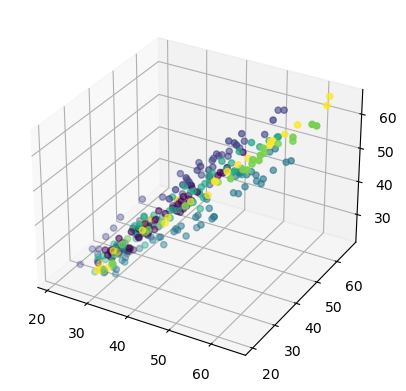

0.77


In [167]:
optimal_k = int(np.sqrt(
    p_points.shape[0]+r_points.shape[0]+n_points.shape[0]+b_points.shape[0]+k_points.shape[0]+q_points.shape[0]
))
p_knn = KNN(k=optimal_k)
p_knn.fit(x_train, y_train)
predictions = p_knn.predict(x_train)

#colors: red->pawn, yellow->rook, green->knight, cyan->bishop, blue->king, magenta->queen
colors = ListedColormap(["#FF0000", "#FFFA00", "#4DFF00", "#00FFC4", "#0032FF", "#FF00FF"])

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(x_train[:, 1], x_train[:, 2], zs=x_train[:, 4], zdir='y', c=y_train)
plt.show()

print(np.sum(predictions == y_train) / len(y_train))